In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as  np
import os

def extract_features_from_entry(values):
    n = np.array([])

    for row in values:
        v = np.sqrt(np.mean(row ** 2)), np.mean(abs(row)), np.sum(row ** 2), np.sum(abs(row))
        v = list(v)
        n = np.hstack((n, np.array(v)))

    return n

WINDOW_SIZE = 150
NUM_OF_SENSORS = 4
OVERLAP = int(WINDOW_SIZE / 2)
THRESHOLD = 220

In [80]:
csv_file = pd.read_csv('./entries_classification_3/1_emg_1.csv')
N = int(csv_file.shape[0])
Fs = 100
frequencies_hz = np.fft.fftfreq(N, 1/Fs)[:N//2 + 1]

emg = csv_file.iloc[:, 1:]
frequencies_hz.size

2501

In [53]:
emg

,data 0,data 1,data 2,data 3
0,5,3,-1,1
1,7,7,2,5
2,8,7,5,6
3,7,4,3,5
4,4,1,1,4
...,...,...,...,...
4995,5,5,9,10
4996,5,2,4,5
4997,3,0,0,2
4998,1,-1,-2,0


In [81]:
c = 0
first = True
values = np.zeros((NUM_OF_SENSORS, WINDOW_SIZE))

l = []

emg_raw = np.zeros((NUM_OF_SENSORS, WINDOW_SIZE))

print(emg.shape)
print(emg_raw.shape)

t = []

for _, row in emg.iterrows():
    emg_raw[:, c] = row

    if (c == WINDOW_SIZE - 1 and first) or (c == OVERLAP + 1 and not first):
        c = OVERLAP
        first = False

        # print(emg_raw)

        emg_raw = np.roll(emg_raw, OVERLAP, axis=1)
        t.append(extract_features_from_entry(emg_raw))
        # print(f'Features {extract_features_from_entry(emg_raw)}')
        wl = np.sum(np.abs(np.abs(emg_raw[0, :])))
        
        l.append(wl)
        
    else:
        c = c + 1


columns = ['RMS', 'MAV', 'SSI', 'IEMG']
columns = [f"{item}_{i}" for i in range(1, NUM_OF_SENSORS + 1) for item in columns] + ['Class']

pd.DataFrame(np.array([np.append(np.array(x), 1) for x in t]), columns=columns)

(5000, 4)
(4, 150)


,RMS_1,MAV_1,SSI_1,IEMG_1,RMS_2,MAV_2,SSI_2,IEMG_2,RMS_3,MAV_3,SSI_3,IEMG_3,RMS_4,MAV_4,SSI_4,IEMG_4,Class
0,4.179314,3.480000,2620.0,522.0,4.147288,3.186667,2580.0,478.0,2.998889,2.313333,1349.0,347.0,3.250641,2.486667,1585.0,373.0,1.0
1,4.070217,3.393333,2485.0,509.0,4.054627,3.106667,2466.0,466.0,2.965356,2.273333,1319.0,341.0,3.243455,2.480000,1578.0,372.0,1.0
2,4.032369,3.340000,2439.0,501.0,3.886730,2.973333,2266.0,446.0,2.869379,2.193333,1235.0,329.0,3.240370,2.473333,1575.0,371.0,1.0
3,4.028234,3.333333,2434.0,500.0,3.872983,2.946667,2250.0,442.0,2.868217,2.186667,1234.0,328.0,3.235223,2.466667,1570.0,370.0,1.0
4,4.085748,3.400000,2504.0,510.0,3.877284,2.966667,2255.0,445.0,2.876340,2.206667,1241.0,331.0,3.320643,2.546667,1654.0,382.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,4.038151,3.346667,2446.0,502.0,3.872983,2.946667,2250.0,442.0,2.868217,2.186667,1234.0,328.0,3.259857,2.506667,1594.0,376.0,1.0
2422,4.090640,3.413333,2510.0,512.0,3.873844,2.953333,2251.0,443.0,2.865891,2.173333,1232.0,326.0,3.332667,2.560000,1666.0,384.0,1.0
2423,4.177719,3.480000,2618.0,522.0,3.912374,3.013333,2296.0,452.0,2.899425,2.220000,1261.0,333.0,3.403919,2.600000,1738.0,390.0,1.0
2424,4.196824,3.493333,2642.0,524.0,3.955587,3.073333,2347.0,461.0,2.950706,2.280000,1306.0,342.0,3.353605,2.566667,1687.0,385.0,1.0


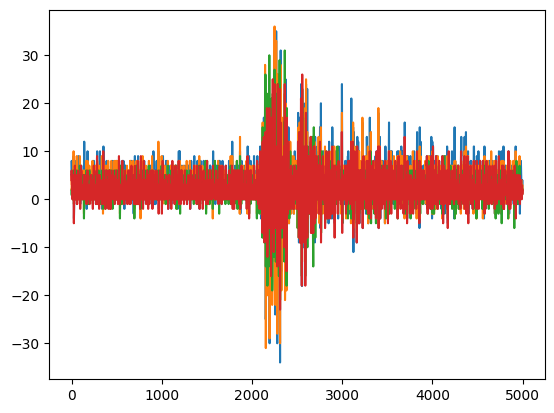

In [77]:
plt.plot(emg)

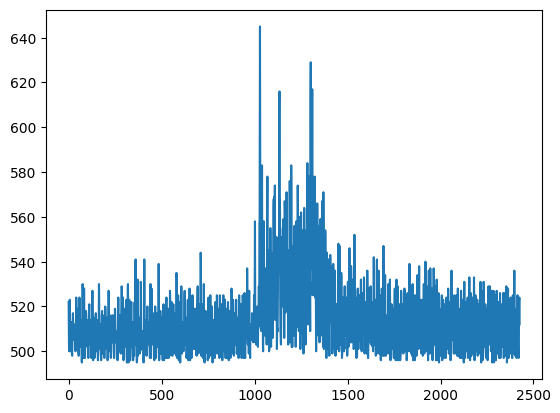

In [82]:
plt.plot(l)

In [23]:
# def get_feature_matrix():
# 
#     rows = []
#     for filename in os.listdir('./entries'):
#         values = pd.read_csv(f'./entries/{filename}').iloc[:, 1:]
#         label = int(filename[0])
# 
#         c = 0
#         first = True
#         emg_raw = np.zeros((NUM_OF_SENSORS, WINDOW_SIZE))
# 
#         for _, row in values.iterrows():
#             emg_raw[:, c] = row
# 
#             if (c == WINDOW_SIZE - 1 and first) or (c == OVERLAP + 1 and not first):
#                 c = OVERLAP
#                 first = False
# 
#                 emg_raw = np.roll(emg_raw, OVERLAP, axis=1)
#                 wl = np.sum(np.abs(np.abs(emg_raw[0, :])))
# 
#                 if wl > THRESHOLD:
#                     row = list(extract_features_from_entry(emg_raw)) + [label]
#                     rows.append(row)
#             else:
#                 c = c + 1
# 
#     return pd.DataFrame(rows, columns=['RMS', 'MAV', 'SSI', 'IEMG', 'Class'])

In [30]:
WINDOW_SIZE = 10
NUM_OF_SENSORS = 2
OVERLAP = int(WINDOW_SIZE / 2)
THRESHOLD = 220


def extract_features_from_entry(values):
    n = np.array([])

    for row in values:
        v = np.sqrt(np.mean(row ** 2)), np.mean(abs(row)), np.sum(row ** 2), np.sum(abs(row))
        v = list(v)
        n = np.hstack((n, np.array(v)))

    return n


def get_feature_matrix():

    rows = []
    for filename in os.listdir('./entries'):
        values = pd.read_csv(f'./entries/{filename}').iloc[:, 1:]
        
        # print(filename[0], filename)
        
        label = int(filename[0])

        c = 0
        first = True
        emg_raw = np.zeros((NUM_OF_SENSORS, WINDOW_SIZE))

        for _, row in values.iterrows():
            emg_raw[:, c] = row

            if (c == WINDOW_SIZE - 1 and first) or (c == OVERLAP + 1 and not first):
                c = OVERLAP
                first = False

                emg_raw = np.roll(emg_raw, OVERLAP, axis=1)
                wl = np.sum(np.abs(np.abs(emg_raw[0, :])))

                if wl > THRESHOLD:
                    row = list(extract_features_from_entry(emg_raw)) + [label]
                    rows.append(row)
            else:
                c = c + 1

        columns = ['RMS', 'MAV', 'SSI', 'IEMG']
        columns = [f"{item}_{i}" for i in range(1, NUM_OF_SENSORS + 1) for item in columns] + ['label']

    return pd.DataFrame(rows, columns=columns)

In [31]:
get_feature_matrix()

,RMS_1,MAV_1,SSI_1,IEMG_1,RMS_2,MAV_2,SSI_2,IEMG_2,label
0,43.845182,39.0,19224.0,390.0,43.845182,39.0,19224.0,390.0,1
1,30.970954,28.6,9592.0,286.0,30.970954,28.6,9592.0,286.0,1
2,39.352255,34.6,15486.0,346.0,39.352255,34.6,15486.0,346.0,1
3,44.485953,40.2,19790.0,402.0,44.485953,40.2,19790.0,402.0,1
4,35.151102,30.0,12356.0,300.0,35.151102,30.0,12356.0,300.0,1
...,...,...,...,...,...,...,...,...,...
4965,33.935232,29.6,11516.0,296.0,33.935232,29.6,11516.0,296.0,2
4966,48.536584,42.6,23558.0,426.0,48.536584,42.6,23558.0,426.0,2
4967,47.213346,41.3,22291.0,413.0,47.213346,41.3,22291.0,413.0,2
4968,31.973426,27.9,10223.0,279.0,31.973426,27.9,10223.0,279.0,2


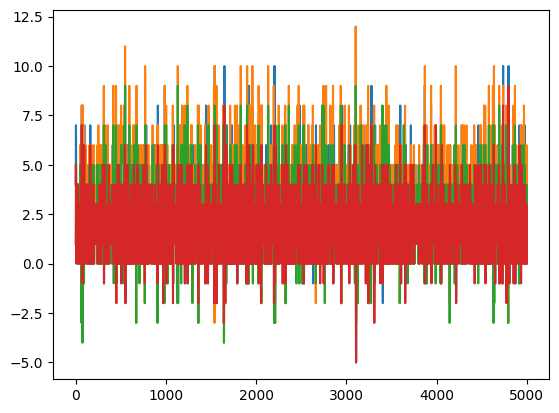

In [39]:

plt.plot(resting)